# Jupyter notebook sample

In [10]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


### Interactive tables

Effortlessly view, navigate, sort, and filter data. Create charts and access essential data insights, including descriptive statistics and missing values – all without writing a single line of code.

   car_ID  carmodel  carname  symboling  fueltype  aspiration  doornumber  \
0       1         0        0          3         0           0           0   
1       2         1        0          3         0           0           0   
2       3         2        0          1         0           0           0   
3       4         3        1          2         0           0           1   
4       5         4        1          2         0           0           1   

   carbody  drivewheel  enginelocation  ...  enginesize  fuelsystem  \
0        0           0               0  ...         130           0   
1        0           0               0  ...         130           0   
2        1           0               0  ...         152           0   
3        2           1               0  ...         109           0   
4        2           2               0  ...         136           0   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0

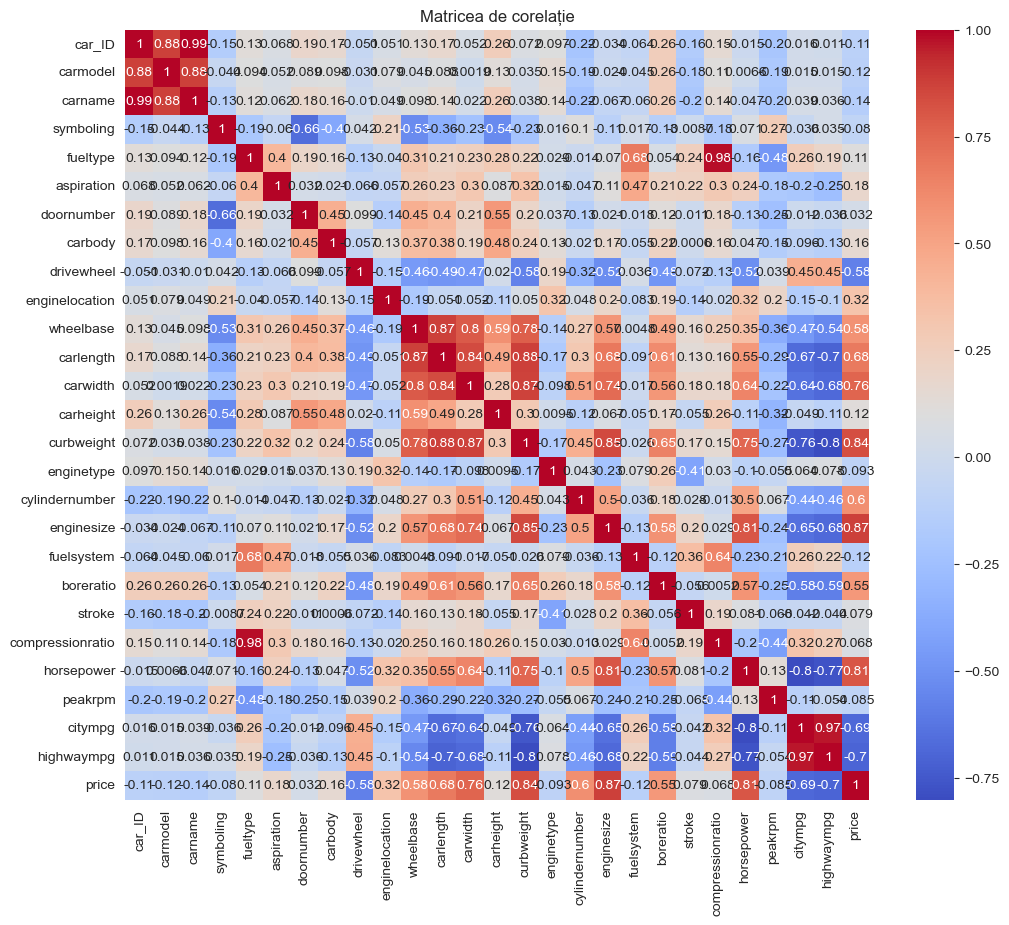

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Specifică calea către fișierul CSV
file_path = r"C:\Program Files\Facultate\MachineLearning\date\CarPrice_Assignment.csv"

# Încarcă datele din fișierul CSV într-un DataFrame folosind pandas
df = pd.read_csv(file_path)

# Adăugăm coloanele 'carmodel' și 'carname'
df['carmodel'] = df['CarName'].apply(lambda x: x.split(' ')[-1])
df['carname'] = df['CarName'].apply(lambda x: x.split(' ')[0])

# Ștergem câmpul "CarName" original
df.drop('CarName', axis=1, inplace=True)

# Lista cu caracteristicile non-numerice
non_numeric_features = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

# Funcție de mapare pentru a transforma valorile non-numerice în valori numerice
def map_non_numeric_values(column):
    unique_values = column.unique()
    mapping = {value: index for index, value in enumerate(unique_values)}
    return column.map(mapping)

# Înlocuirea valorilor non-numerice cu valori numerice pentru fiecare coloană non-numerică
for feature in non_numeric_features:
    df[feature] = map_non_numeric_values(df[feature])

# Salvăm modificările înapoi în fișierul CSV
df.to_csv(r"C:\Program Files\Facultate\MachineLearning\date\DATE.csv", index=False)

# Obținem numele coloanelor
columns = df.columns.tolist()

# Obținem numele ultimelor două coloane
last_two_columns = columns[-2:]

# Ștergem ultimele două coloane din lista de coloane
columns = columns[:-2]

# Inserează ultimele două coloane pe pozițiile 1 și 2
for i, col_name in enumerate(last_two_columns):
    df.insert(i + 1, col_name, df.pop(col_name))

# Afișăm primele câteva rânduri pentru a ne asigura că modificările sunt făcute corect
print(df.head())

# Calculăm matricea de corelație
correlation_matrix = df.corr()

# Afișăm matricea de corelație
print(correlation_matrix)

# Vizualizăm matricea de corelație folosind seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matricea de corelație')
plt.show()


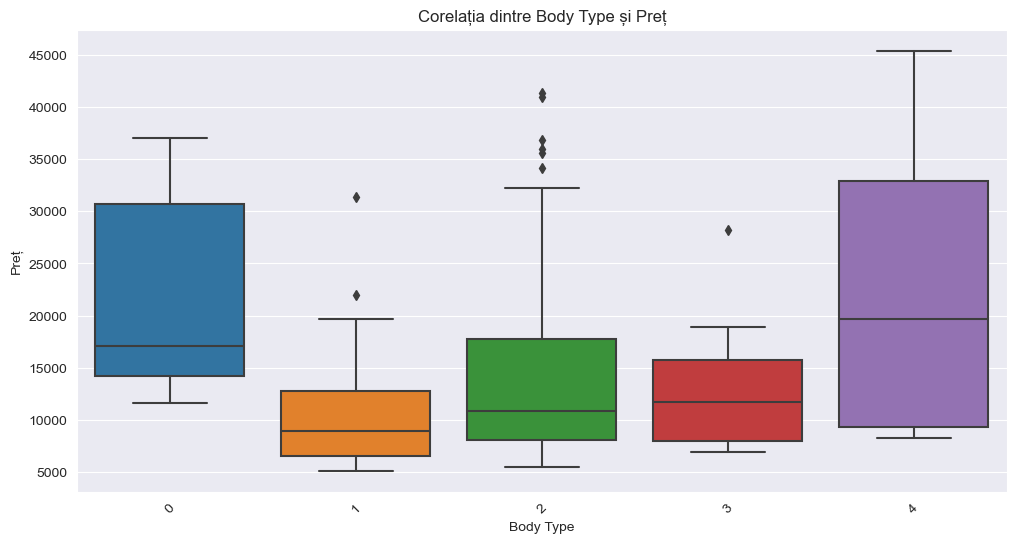

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='carbody', y='price', data=df)
plt.xticks(rotation=45)  # Rotirea etichetelor axei x pentru a fi mai ușor de citit
plt.title('Corelația dintre Body Type și Preț')
plt.xlabel('Body Type')
plt.ylabel('Preț')
plt.show()

In [13]:
import pandas as pd

# Presupunem că df este DataFrame-ul tău și ai o coloană 'price' care conține prețul mașinilor

# Lista cu numele categoriilor pentru care să calculăm indicele Gini
categorii = ['carname', 'carmodel', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
             'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'horsepower', 'citympg', 'highwaympg', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'boreratio', 'stroke', 'compressionratio', 'peakrpm']

def calculate_gini_index(df, attribute):
    # Calcularea numărului total de înregistrări
    total_records = len(df)

    # Inițializarea variabilelor pentru stocarea ponderilor și a indicelui Gini
    gini_index = 0
    attribute_values = df[attribute].unique()

    # Calcularea indicelui Gini pentru fiecare valoare a atributului
    for value in attribute_values:
        subset = df[df[attribute] == value]
        proportion = len(subset) / total_records
        price_values = subset['price'].values
        gini_value = 1
        for price_value in price_values:
            gini_value -= (price_values.tolist().count(price_value) / len(price_values)) ** 2
        gini_index += proportion * gini_value

    return gini_index

# Calcularea indicelui Gini pentru fiecare categorie
gini_results = []
for categorie in categorii:
    gini_index = calculate_gini_index(df, categorie)
    gini_results.append((categorie, gini_index))

# Sortarea rezultatelor după indicele Gini în ordine crescătoare
sorted_gini_results = sorted(gini_results, key=lambda x: x[1])

# Afișarea primilor 3 cei mai buni atribuți în funcție de indicele Gini
print("Primii 3 cei mai buni atribuți în funcție de Gini Index:")
for i, (categorie, gini_index) in enumerate(sorted_gini_results[:3], 1):
    print(f"{i}. {categorie}: {gini_index:.4f}")


Primii 3 cei mai buni atribuți în funcție de Gini Index:
1. curbweight: 0.0976
2. carmodel: 0.4146
3. carlength: 0.5966


In [14]:
def calculate_information_quantity(df, attribute):
    # Calcularea impurității inițiale (indicele Gini) pentru setul de date
    initial_gini = calculate_gini_index(df, 'price')

    # Calcularea numărului total de înregistrări
    total_records = len(df)

    # Inițializarea variabilelor pentru stocarea reducerii impurității și a informației
    information_quantity = 0
    attribute_values = df[attribute].unique()

    # Calcularea reducerii impurității pentru fiecare valoare a atributului
    for value in attribute_values:
        subset = df[df[attribute] == value]
        proportion = len(subset) / total_records
        subset_gini = calculate_gini_index(subset, 'price')
        information_quantity += proportion * (initial_gini - subset_gini)

    return information_quantity

# Calcularea informației pentru fiecare categorie
information_quantities = {}
for categorie in categorii:
    information_quantity = calculate_information_quantity(df, categorie)
    information_quantities[categorie] = information_quantity

# Sortăm rezultatele în ordine descrescătoare și afișăm primele 3 atribute cele mai bune
top_3_attributes = sorted(information_quantities.items(), key=lambda x: x[1], reverse=True)[:3]
print("Cele mai bune 3 atribute în funcție de cantitatea de informație:")
for attribute, info_quantity in top_3_attributes:
    print(f"{attribute}: {info_quantity:.4f}")


Cele mai bune 3 atribute în funcție de cantitatea de informație:
enginelocation: 0.0000
aspiration: -0.0098
cylindernumber: -0.0098


Mean Squared Error (MSE): 14373850.993969394
Mean Absolute Error (MAE): 2344.2381829268293


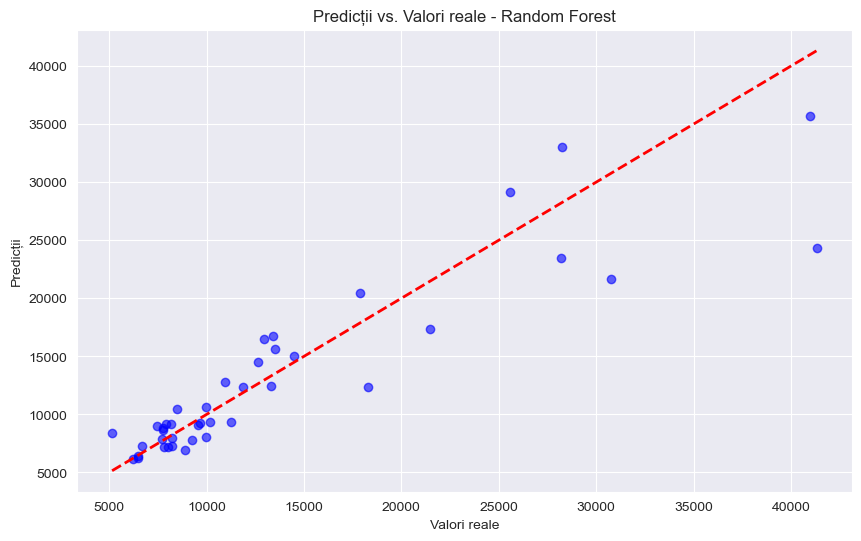

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Transformăm caracteristicile textuale în valori numerice
label_encoders = {}
categorical_features = ['carmodel', 'carname', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem']

for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

# Definim caracteristicile (X) și variabila țintă (y)
X = df[['carmodel', 'carlength', 'curbweight', 'cylindernumber', 'aspiration', 'enginelocation']]  # Înlocuiește acestea cu numele caracteristicilor din setul tău de date
y = df['price']  # Înlocuiește 'price' cu numele variabilei țintă din setul tău de date

# Împărțim datele în seturi de antrenare și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inițializăm și antrenăm modelul de regresie Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Poți ajusta numărul de arbori (n_estimators) la nevoie
model.fit(X_train, y_train)

# Facem predicții pe setul de testare
predictions = model.predict(X_test)

# Calculează MSE și MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Trasează graficul predicțiilor vs. valorile reale
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Predicții vs. Valori reale - Random Forest')
plt.xlabel('Valori reale')
plt.ylabel('Predicții')
plt.grid(True)
plt.show()


Mean Squared Error (MSE): 16195121.703574019
Mean Absolute Error (MAE): 2552.0806228454594
Precizia modelului: 81.08%


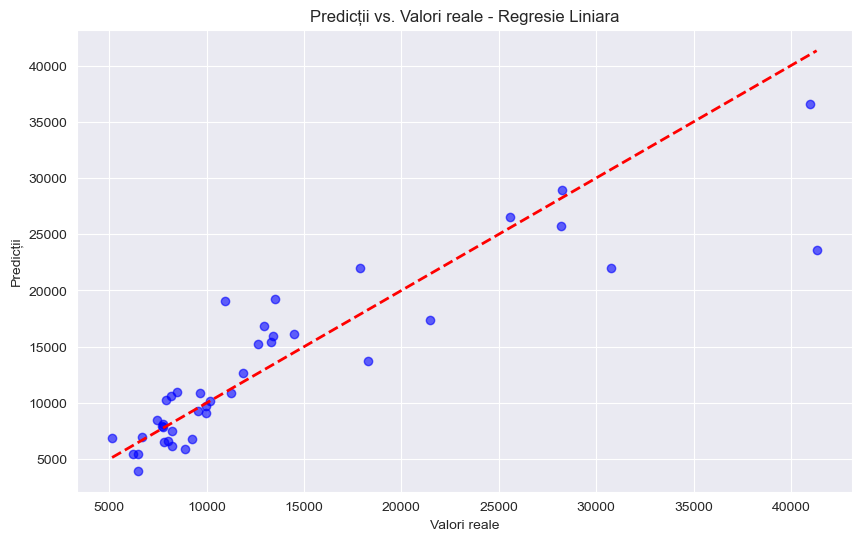

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Transformăm caracteristicile textuale în valori numerice
label_encoders = {}
categorical_features = ['carmodel', 'carname', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem']

for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

# Definim caracteristicile (X) și variabila țintă (y)
X = df[['carmodel', 'carlength', 'curbweight', 'cylindernumber', 'aspiration', 'enginelocation']]  # Selectăm caracteristicile dorite
y = df['price']  # Variabila țintă

# Împărțim datele în seturi de antrenare și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inițializăm și antrenăm modelul de regresie liniară
model = LinearRegression()
model.fit(X_train, y_train)

# Facem predicții pe setul de testare
predictions = model.predict(X_test)

# Calculează MSE și MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Calculează precizia în procente
mean_actual_price = y_test.mean()
precision = 100 - (mae / mean_actual_price) * 100
print("Precizia modelului: {:.2f}%".format(precision))

# Trasează graficul predicțiilor vs. valorile reale
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Predicții vs. Valori reale - Regresie Liniara')
plt.xlabel('Valori reale')
plt.ylabel('Predicții')
plt.grid(True)
plt.show()


Mean Squared Error (MSE): 22438464.73058266
Mean Absolute Error (MAE): 2879.239829268293


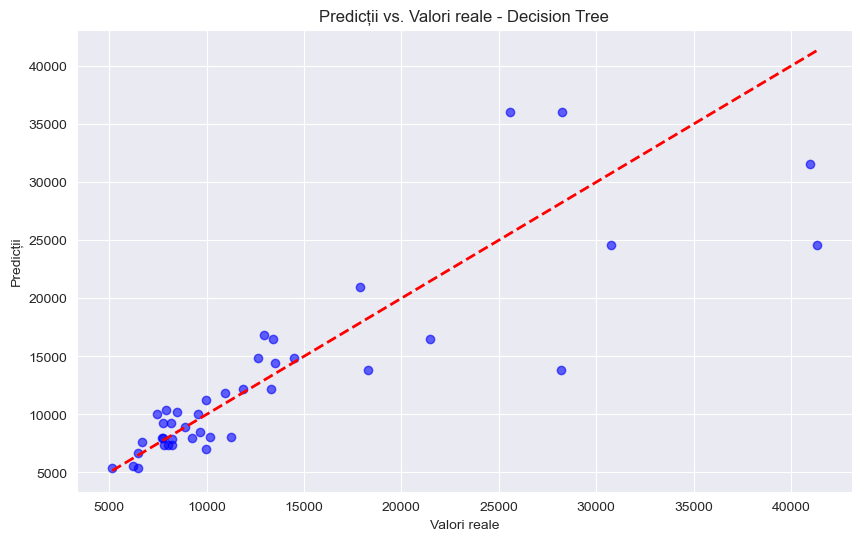

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Transformăm caracteristicile textuale în valori numerice
label_encoders = {}
categorical_features = ['carmodel', 'carname', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem']

for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

# Definim caracteristicile (X) și variabila țintă (y)
X = df[['carmodel', 'carlength', 'curbweight', 'cylindernumber', 'aspiration', 'enginelocation']]  # Selectăm caracteristicile dorite
y = df['price']  # Variabila țintă

# Împărțim datele în seturi de antrenare și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inițializăm și antrenăm modelul de regresie cu un arbore de decizie
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Facem predicții pe setul de testare
predictions = model.predict(X_test)

# Calculează MSE și MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Trasează graficul predicțiilor vs. valorile reale
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Predicții vs. Valori reale - Decision Tree')
plt.xlabel('Valori reale')
plt.ylabel('Predicții')
plt.grid(True)
plt.show()


Primele 10 predicții: [13495. 16500. 16500. 18920. 18920. 13950.  6295.  6295.  6295. 20970.]
Mean Absolute Error (MAE): 1749.0555333333332
Precizia modelului: 89.22%


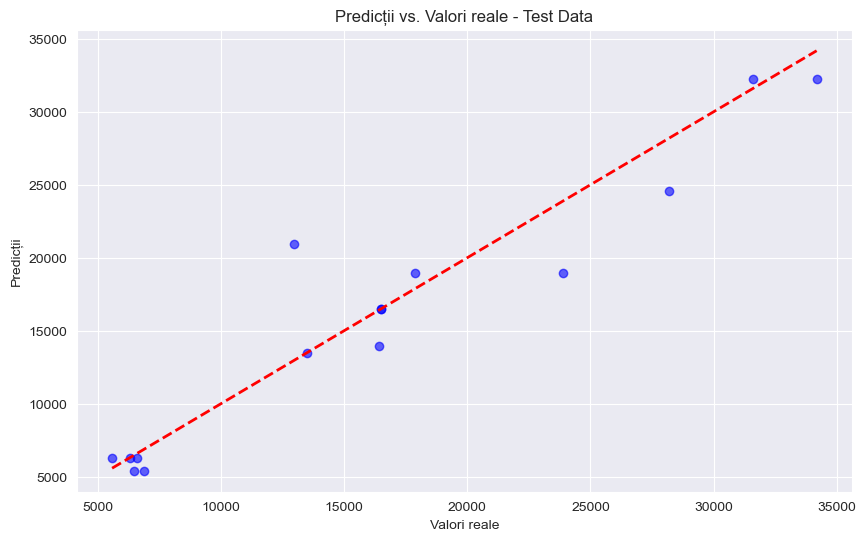

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Definim și antrenăm label_encoders pentru datele test
def encode_features(df, categorical_features):
    label_encoders = {}
    for feature in categorical_features:
        label_encoders[feature] = LabelEncoder()
        df[feature] = label_encoders[feature].fit_transform(df[feature])
    return df, label_encoders

# Caracteristici categorice care trebuie transformate
categorical_features = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'carmodel', 'carname']

# Încarcă datele din fișierul CSV
test_cars_df = pd.read_csv('test_cars.csv')

# Transformăm caracteristicile textuale în valori numerice folosind label_encoders
test_cars_df, label_encoders = encode_features(test_cars_df, categorical_features)

# Definim caracteristicile (X) și variabila țintă (y)
X_test = test_cars_df[['carmodel', 'carlength', 'curbweight', 'cylindernumber', 'aspiration', 'enginelocation']]  # Selectăm caracteristicile dorite
y_test = test_cars_df['price']  # Variabila țintă

# Presupunem că modelul Random Forest a fost antrenat anterior și este disponibil
# De exemplu:
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# Facem predicții pentru noile date folosind modelul Random Forest antrenat anterior
new_predictions = model.predict(X_test)

# Calculează MAE
mae = mean_absolute_error(y_test, new_predictions)

# Calculează precizia în procente
mean_actual_price = y_test.mean()
precision = 100 - (mae / mean_actual_price) * 100

# Afișăm primele câteva predicții
print("Primele 10 predicții:", new_predictions[:10])
print("Mean Absolute Error (MAE):", mae)
print("Precizia modelului: {:.2f}%".format(precision))

# Trasează graficul predicțiilor vs. valorile reale
plt.figure(figsize=(10, 6))
plt.scatter(y_test, new_predictions, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Predicții vs. Valori reale - Test Data')
plt.xlabel('Valori reale')
plt.ylabel('Predicții')
plt.grid(True)
plt.show()
